In [1]:
import networkx as nx
import retworkx as rx
import matplotlib.pyplot as plt
import random as rd
from conjugate_gradient import conjugate_gradient_opt,conjugate_gradient_back
import sys
sys.path.append('\graph_immunization')
from network_generation import *
from vulnerability_meas import max_ev
import numpy as np
from tqdm import tqdm


In [2]:
N = 1000
G  = small_world(N)
#G = config_model(1000)

In [6]:
vaccinated = conjugate_gradient_opt(G,N)

100%|██████████| 1000/1000 [01:05<00:00, 15.29it/s]


In [7]:


### conjugate_grad
Gr = rx.networkx_converter(G)
eig_start = max_ev(Gr)
eigendrop = [0]
cost = [0]
grad=[0]
n_calc=20
A= rx.adjacency_matrix(Gr)
l_index = list(range(N))
score = 0
for i in tqdm(range(0,N)):
    node = vaccinated[i]
    A = np.delete(A,l_index.index(node),0)
    A = np.delete(A,l_index.index(node),1)
    l_index.remove(node)
    eig=0
    for j in range(n_calc):
        eig += max_ev(A=A)
    eigendrop.append(eig_start-eig/n_calc)
    score+=eig/n_calc
    cost.append((i+1)/N)
    grad.append((eigendrop[-1]-eigendrop[-2]))
print(score)

100%|██████████| 1000/1000 [00:14<00:00, 70.94it/s]

6306.3170012947185


In [3]:
vacc_back = conjugate_gradient_back(G,N)

### conjugate_grad back
Gr = rx.networkx_converter(G)
eig_start = max_ev(Gr)
eig_back = [0]
cost = [0]
n_calc=20
A= rx.adjacency_matrix(Gr)
l_index = list(range(N))
score = 0
for i in tqdm(range(0,N)):
    node = vacc_back[i]
    A = np.delete(A,l_index.index(node),0)
    A = np.delete(A,l_index.index(node),1)
    l_index.remove(node)
    eig=0
    for j in range(n_calc):
        eig += max_ev(A=A)
    eig_back.append(eig_start-eig/n_calc)
    cost.append((i+1)/N)
    score+=eig/n_calc

print(score)

  0%|          | 0/1000 [00:00<?, ?it/s]\\home\wemaerem$\graph_immunization\gradient_optimization\conjugate_gradient.py:30: RuntimeWarning: divide by zero encountered in reciprocal
  return b_k,np.reciprocal(b_k)/1000
100%|██████████| 1000/1000 [00:12<00:00, 80.82it/s]

6043.095811436312


In [ ]:
## vacc random
vaccinated_rd = list(range(N))
rd.shuffle(vaccinated_rd)
eigendrop_rd = [0]
n_calc=20
score=0
for i in range(1,N+1):
    G_i = Gr.copy()
    G_i.remove_nodes_from(vaccinated_rd[:i])
    eig=0
    for j in range(n_calc):
        eig += max_ev(G_i)
    eigendrop_rd.append(eig_start-eig/n_calc)
    score+=eig/n_calc
print(score)

780.3917703653581


In [ ]:
## deg centrality no recomp

deg =  [node for (node, val) in sorted(G.degree(), key=lambda pair: pair[1])]
eigendrop_deg = [0]
n_calc=20
for i in range(1,N+1):
    G_i = Gr.copy()
    G_i.remove_nodes_from(deg[:i])
    eig=0
    for j in range(n_calc):
        eig += max_ev(G_i)
    eigendrop_deg.append(eig_start-eig/n_calc)


In [ ]:
## betweennes centrality no recomp

centr = list(nx.betweenness_centrality(G).values())
vacc_centr = np.argsort(centr)
vacc_centr = np.flip(vacc_centr)

eigendrop_cent = [0]
n_calc=20
for i in range(1,N+1):
    G_i = Gr.copy()
    G_i.remove_nodes_from(vacc_centr[:i])
    eig=0
    for j in range(n_calc):
        eig += max_ev(G_i)
    eigendrop_cent.append(eig_start-eig/n_calc)


In [ ]:
from Vaccination_select import centrality_max_recomp,deg_max

vacc_centr_r=centrality_max_recomp(G,N)
vacc_deg_r=deg_max(G,N)

eigendrop_cent_r = [0]
score = 0
for i in range(1,N+1):
    G_i = Gr.copy()
    G_i.remove_nodes_from(vacc_centr_r[:i])
    eig=0
    for j in range(n_calc):
        eig += max_ev(G_i)
    score+=eig/n_calc
    eigendrop_cent_r.append(eig_start-eig/n_calc)
print(score)

score=0
eigendrop_deg_r = [0]
for i in range(1,N+1):
    G_i = Gr.copy()
    G_i.remove_nodes_from(vacc_deg_r[:i])
    eig=0
    for j in range(n_calc):
        eig += max_ev(G_i)
    score+=eig/n_calc
    eigendrop_deg_r.append(eig_start-eig/n_calc)
print(score)




100%|██████████| 100/100 [00:00<00:00, 2019.72it/s]


747.8639953619645
724.2422957084069


In [ ]:
## ant colony
vacc_ant = np.load('ant_colony.npy').astype(int)

score=0
eigendrop_ant = [0]
for i in range(1,N+1):
    G_i = Gr.copy()
    G_i.remove_nodes_from(vacc_ant[:i])
    eig=0
    for j in range(n_calc):
        eig += max_ev(G_i)
    score+=eig/n_calc
    eigendrop_ant.append(eig_start-eig/n_calc)
print(score)


764.8293383380828


In [ ]:

np.save("ed_conj_grad_smallworld.npy",np.array([cost,eigendrop,eigendrop_rd]))

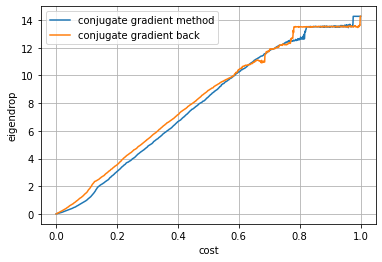

In [8]:
plt.figure(1)
plt.plot(cost,eigendrop,label="conjugate gradient method")
plt.plot(cost,eig_back,label="conjugate gradient back")
#plt.plot(cost,grad,label="grad of the method")
#plt.plot(cost,eigendrop_rd,label="random vaccination")
#plt.plot(cost,eigendrop_deg,label="degree centrality no recomp")
#plt.plot(cost,eigendrop_cent,label="betweenness centrality no recomp")
#plt.plot(cost,eigendrop_deg_r,label="degree centrality ")
#plt.plot(cost,eigendrop_cent_r,label="betweenness centrality ")
#plt.plot(cost,eigendrop_ant,label='ant colony')
plt.grid()
plt.xlabel('cost')
plt.ylabel("eigendrop")
plt.legend()
plt.show()

In [ ]:
k=1
for i in range(1,1001):
    k*=i
s =str(k)
print(len(s))

2568
